<a href="https://colab.research.google.com/github/davidmertenjones/Thinkful_DSB_Unit_5/blob/master/DSB_5_5_4_What_test_to_use.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESS Data - Parametric/Non-Parametric Tests

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [0]:
path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'

In [0]:
df = pd.read_csv(path)

In [4]:
df.shape

(8594, 13)

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [6]:
for column in df.columns:
  print(column, (len(df) - len(df[df[column].isna()]))/len(df))

cntry 1.0
idno 1.0
year 1.0
tvtot 0.9990691179892949
ppltrst 0.998370956481266
pplfair 0.9954619501978125
pplhlp 0.9970909937165464
happy 0.9963928322085176
sclmeet 0.9982545962299278
sclact 0.9890621363742146
gndr 0.9988363974866186
agea 0.9721898999301839
partner 0.9980218757272515


In [0]:
df = df.dropna()

In [8]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [0]:
df['partner'] = df['partner'].replace(2, 0)

In [0]:
country_list = df['cntry'].unique().tolist()

country_dict = {'ES':'Spain', 'SE':'Sweden', 'CH':'Switzerland', 
               'NO':'Norway', 'CZ':'Czech Republic', 'DE':'Denmark'}

In [11]:
for column in df.columns:
  print(df[column].value_counts())

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64
1208.0     8
2077.0     8
1247.0     8
1035.0     8
1353.0     8
1431.0     8
1361.0     8
1418.0     8
2102.0     8
1096.0     7
1453.0     7
1448.0     7
1463.0     7
1236.0     7
1017.0     7
1468.0     7
1430.0     6
1092.0     6
1336.0     6
1220.0     6
1230.0     6
1103.0     6
1306.0     6
1014.0     6
1287.0     6
1577.0     6
1009.0     6
2060.0     6
1072.0     6
1906.0     6
          ..
715.0      1
750.0      1
14460.0    1
885.0      1
1713.0     1
2185.0     1
12810.0    1
2809.0     1
482.0      1
14652.0    1
3561.0     1
2347.0     1
190.0      1
3313.0     1
17460.0    1
1472.0     1
568.0      1
15912.0    1
6684.0     1
2711.0     1
2354.0     1
15072.0    1
1954.0     1
20316.0    1
13920.0    1
16488.0    1
9846.0     1
7878.0     1
356.0      1
2361.0     1
Name: idno, Length: 3076, dtype: int64
7    4076
6    4071
Name: year, dtype: int64
2.0    1391
4.0    1344
3.0    

## See if we can use paired samples:

In [0]:
# Switzerland
ch2012ids = df[(df['year'] == 6) & (df['cntry'] == 'CH')].idno.unique().tolist()
ch2014ids = df[(df['year'] == 7) & (df['cntry'] == 'CH')].idno.unique().tolist()

# Czech Republic
cz2012ids = df[(df['year'] == 6) & (df['cntry'] == 'CZ')].idno.unique().tolist()
cz2014ids = df[(df['year'] == 7) & (df['cntry'] == 'CZ')].idno.unique().tolist()

# Denmark
de2012ids = df[(df['year'] == 6) & (df['cntry'] == 'DE')].idno.unique().tolist()
de2014ids = df[(df['year'] == 7) & (df['cntry'] == 'DE')].idno.unique().tolist()

# Spain
es2012ids = df[(df['year'] == 6) & (df['cntry'] == 'ES')].idno.unique().tolist()
es2014ids = df[(df['year'] == 7) & (df['cntry'] == 'ES')].idno.unique().tolist()

# Norway
no2012ids = df[(df['year'] == 6) & (df['cntry'] == 'NO')].idno.unique().tolist()
no2014ids = df[(df['year'] == 7) & (df['cntry'] == 'NO')].idno.unique().tolist()

# Sweden
se2012ids = df[(df['year'] == 6) & (df['cntry'] == 'SE')].idno.unique().tolist()
se2014ids = df[(df['year'] == 7) & (df['cntry'] == 'SE')].idno.unique().tolist()

# Year lists by country
year2012ids = [ch2012ids, cz2012ids, de2012ids, es2012ids, no2012ids, se2012ids]
year2014ids = [ch2014ids, cz2014ids, de2014ids, es2014ids, no2014ids, se2014ids]

In [13]:
for cntry, id in zip(country_list, year2012ids):
  print(cntry, len(id))

CH 732
CZ 601
DE 13
ES 1158
NO 708
SE 859


In [14]:
for cntry, id in zip(country_list, year2014ids):
  print(cntry, len(id))

CH 743
CZ 606
DE 14
ES 1134
NO 712
SE 867


In [15]:
ch_overlap = list(set(ch2012ids) & set(ch2014ids))
es_overlap = list(set(es2012ids) & set(es2014ids))
no_overlap = list(set(no2012ids) & set(no2014ids))
se_overlap = list(set(se2012ids) & set(se2014ids))
cz_overlap = list(set(cz2012ids) & set(cz2014ids))
de_overlap = list(set(de2012ids) & set(de2014ids))

overlaps = [ch_overlap, es_overlap, no_overlap, se_overlap, cz_overlap, de_overlap]

for cntry, overlap in zip(country_list, overlaps):
  print(cntry, len(overlap))

CH 707
CZ 1085
DE 689
ES 827
NO 556
SE 13


In [16]:
ch_all_users = list(set(ch2012ids + ch2014ids))
es_all_users = list(set(es2012ids + es2014ids))
no_all_users = list(set(no2012ids + no2014ids))
se_all_users = list(set(se2012ids + se2014ids))
cz_all_users = list(set(cz2012ids + cz2014ids))
de_all_users = list(set(de2012ids + de2014ids))

all_users = [ch_all_users, es_all_users, no_all_users, se_all_users, cz_all_users, de_all_users]

for cntry, all_user in zip(country_list, all_users):
  print(cntry, len(all_user))

CH 768
CZ 1207
DE 731
ES 899
NO 651
SE 14


#### Percentage of each country's respondents that have paired data:

In [17]:
for cntry, overlap, all_user in zip(country_list, overlaps, all_users):
  print(cntry, len(overlap)/len(all_user))

CH 0.9205729166666666
CZ 0.8989229494614748
DE 0.9425444596443229
ES 0.9199110122358176
NO 0.8540706605222734
SE 0.9285714285714286


This doesn't account for everybody in the dataset, but this looks pretty good. If we use these subsets as paired samples, we can preserve the majority of the data in the dataset. We'll compare this to our results with independent samples.

In [0]:
overlap_dict = {"CH":ch_overlap, "ES":es_overlap, "NO":no_overlap,
                "SE":se_overlap, "CZ":cz_overlap, "DE":de_overlap}

# QQ Plots

Quantile-Quantile plot for idno:


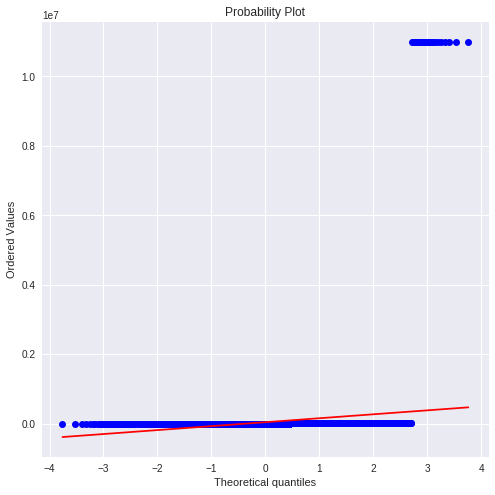

Quantile-Quantile plot for tvtot:


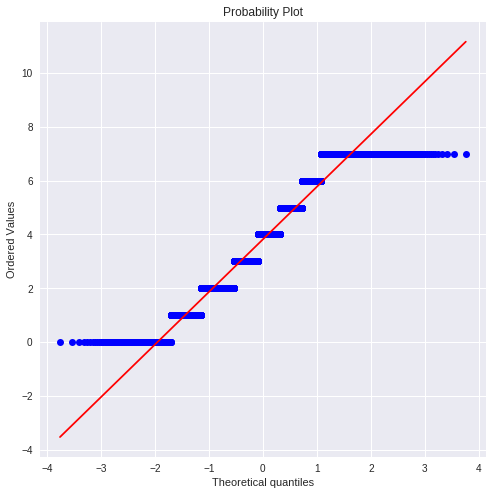

Quantile-Quantile plot for ppltrst:


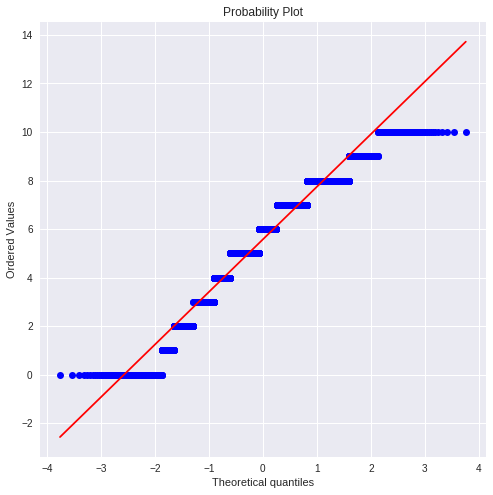

Quantile-Quantile plot for pplfair:


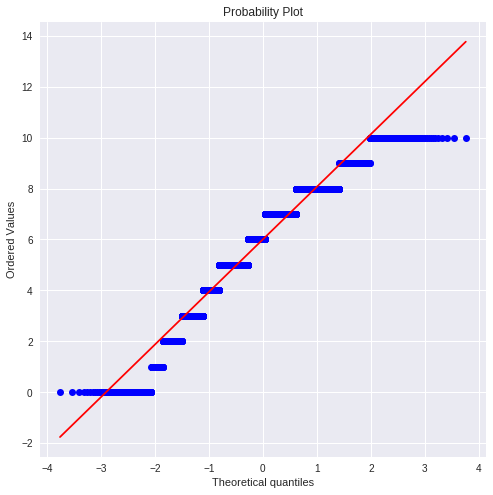

Quantile-Quantile plot for pplhlp:


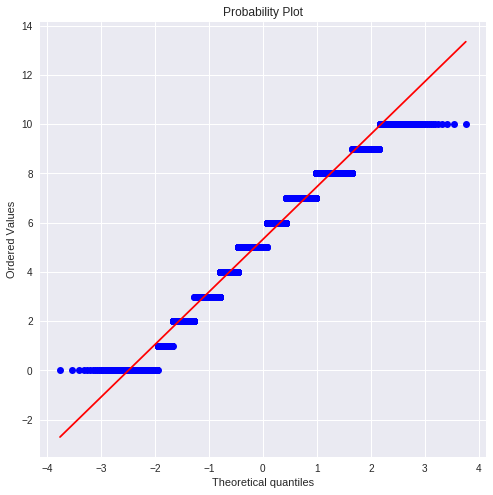

Quantile-Quantile plot for happy:


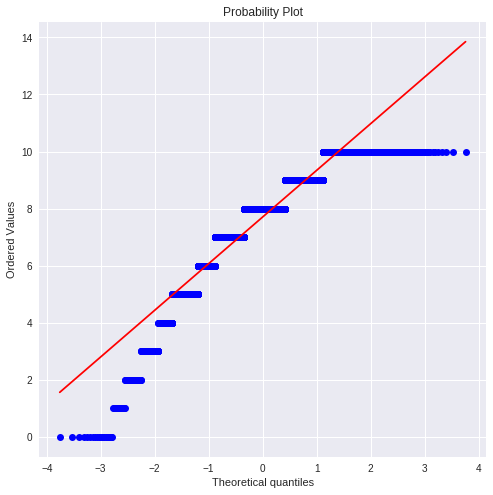

Quantile-Quantile plot for sclmeet:


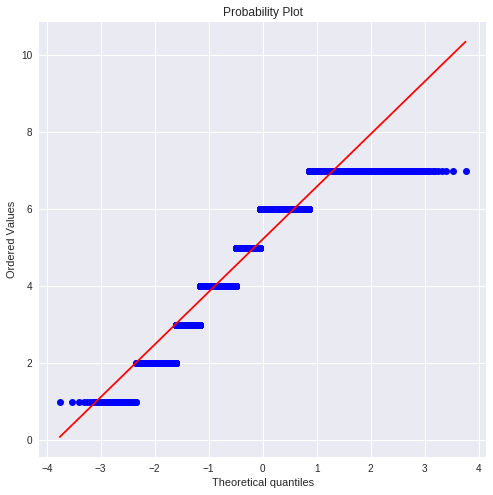

Quantile-Quantile plot for sclact:


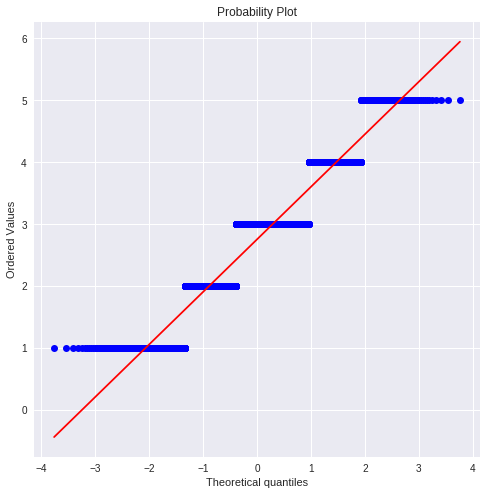

Quantile-Quantile plot for gndr:


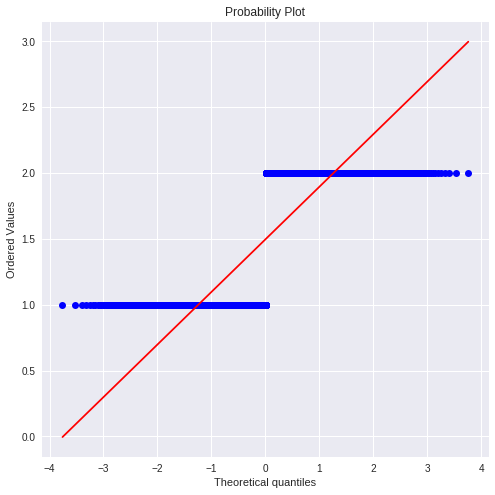

Quantile-Quantile plot for agea:


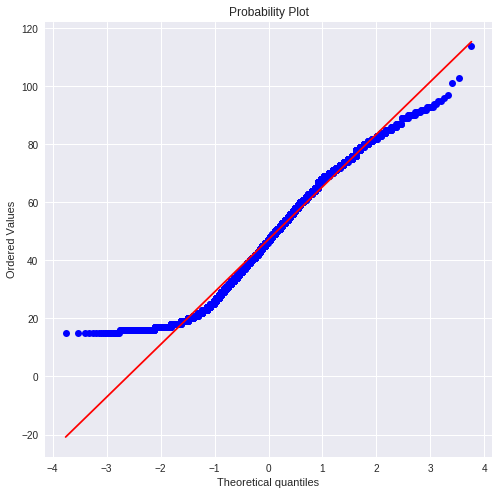

Quantile-Quantile plot for partner:


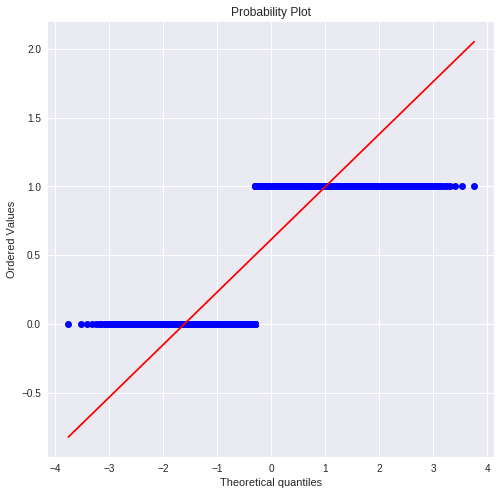

In [19]:
plt.rcParams['figure.figsize'] = 8, 8

for column in df.columns:
  if column != 'cntry' and column != 'year':
    
    print('Quantile-Quantile plot for {}:'.format(column))
    # QQ Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scipy.stats.probplot(df[column], plot=ax)
    plt.show()

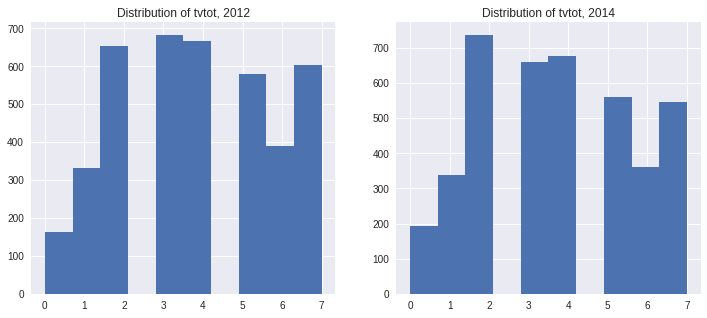

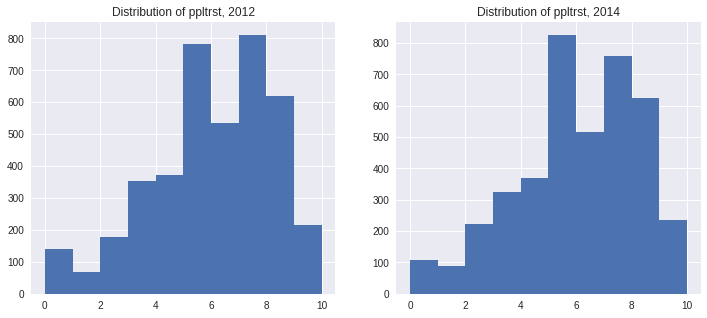

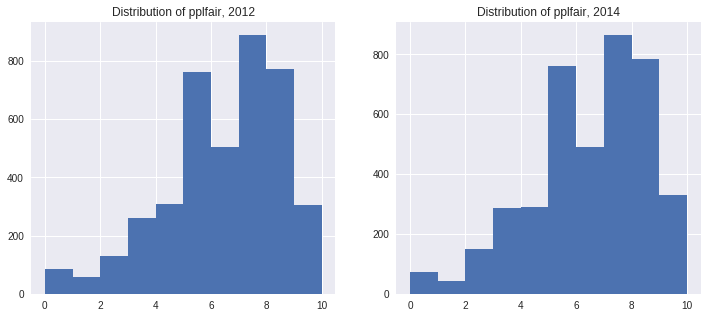

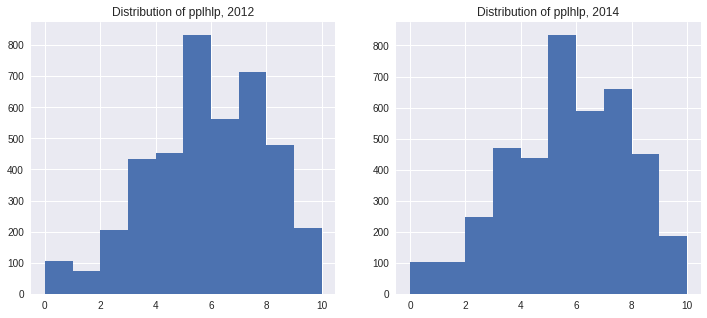

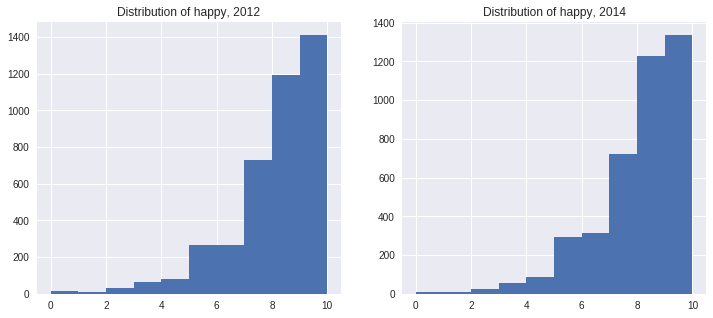

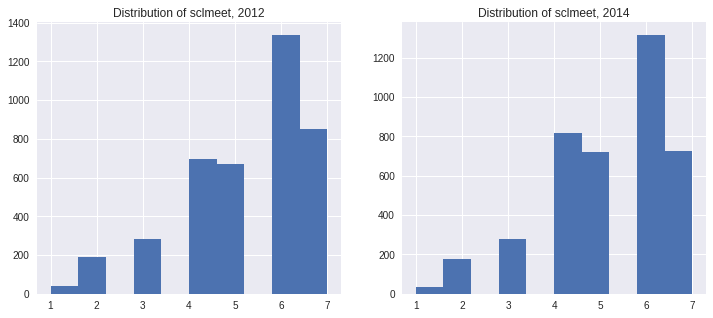

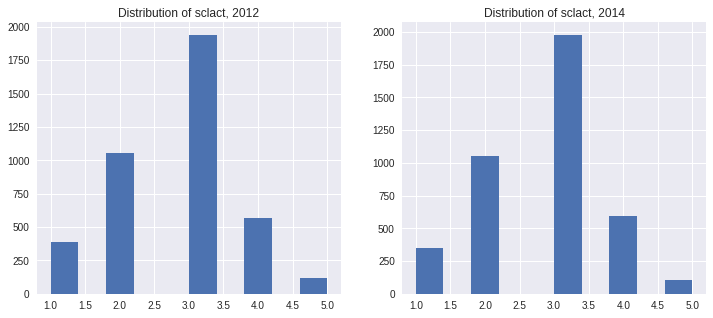

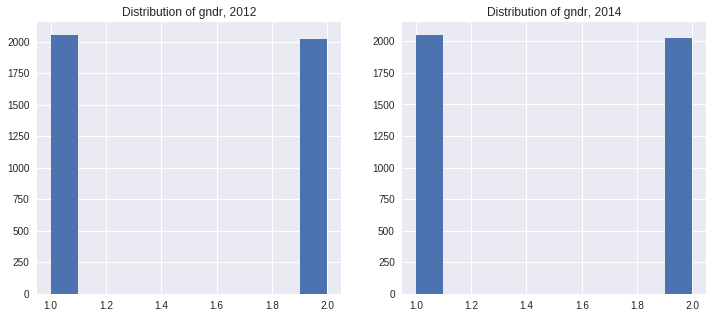

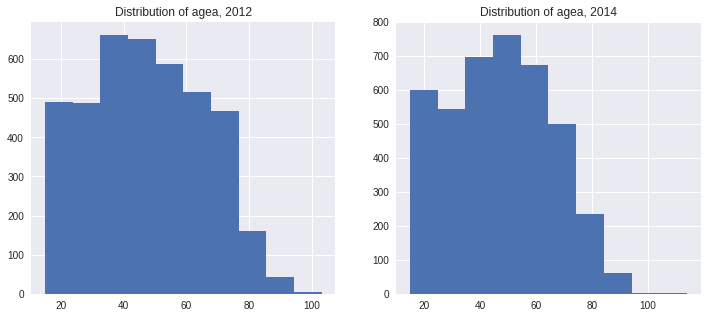

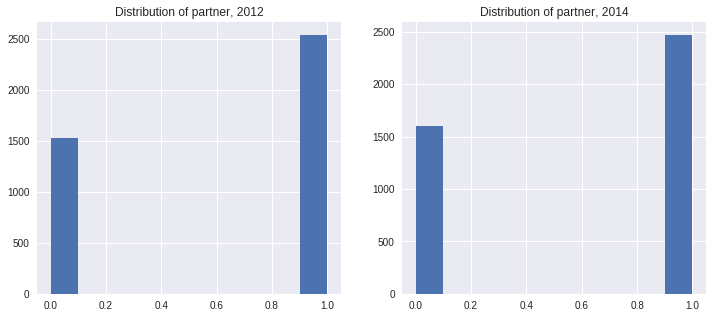

In [20]:
plt.rcParams['figure.figsize'] = 12, 5

for column in df.columns:
  if column != 'cntry' and column != 'year' and column != 'idno':
    
    plt.subplot(1, 2, 1)
    plt.title('Distribution of {}, 2012'.format(column))
    plt.hist(df[df['year'] == 6][column])
    
    plt.subplot(1, 2, 2)
    plt.title('Distribution of {}, 2014'.format(column))
    plt.hist(df[df['year'] == 7][column])
    plt.show()
    
plt.rcParams['figure.figsize'] = 8, 5

# A/B Tests (Independent/Paired Comparisons)

## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

These distributions *appear* fairly normal, but we can apply a Shapiro-Wilk test to get a more accurate picture. A p-value of less than 0.05 means we can reject the null hypothesis that the data is normally distributed, while a p-value of 0.05 or greater indicates that the data could be normally distributed.

In [21]:
scipy.stats.shapiro(df[df['year'] == 6]['ppltrst'])

(0.9520939588546753, 1.4426241793085802e-34)

In [22]:
scipy.stats.shapiro(df[df['year'] == 7]['ppltrst'])

(0.9580563902854919, 9.222525335052542e-33)

Those p-values are both extremely low. We can therefore reject the null hypothesis that these are normally distributed variables. The W-statistic indicates that they are relatively close to normal, though.

In [23]:
scipy.stats.ttest_ind(df[df['year'] == 6]['ppltrst'], df[df['year'] == 7]['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

Looking at all countries in one chunk, the level of trust did not change in a statistically significant amount between 2012 and 2014.

### Kruskal-Wallis Test

Switzerland 

Shapiro Normality 2012: (0.9517108201980591, 9.511383786695374e-15)
Shapiro Normality 2014: (0.9547930955886841, 2.4654701498145852e-14)
Mean "ppltrst" 2012: (0.9517108201980591, 9.511383786695374e-15)
Mean "ppltrst" 2014: (0.9547930955886841, 2.4654701498145852e-14)

 KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)
Do not reject null hypothesis.


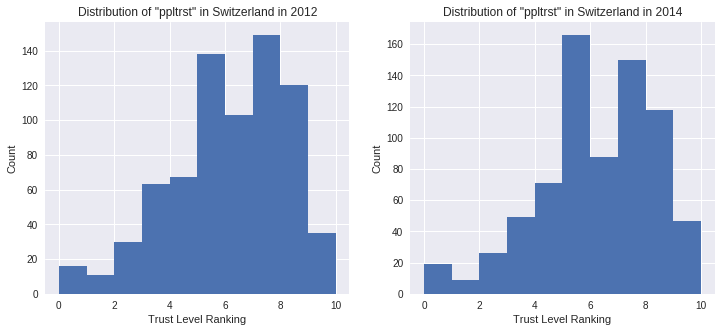

Czech Republic 

Shapiro Normality 2012: (0.9680074453353882, 3.6126571179018185e-10)
Shapiro Normality 2014: (0.9715775847434998, 1.8777941424019673e-09)
Mean "ppltrst" 2012: (0.9680074453353882, 3.6126571179018185e-10)
Mean "ppltrst" 2014: (0.9715775847434998, 1.8777941424019673e-09)

 KruskalResult(statistic=3.397334444818437e-05, pvalue=0.9953494239190417)
Do not reject null hypothesis.


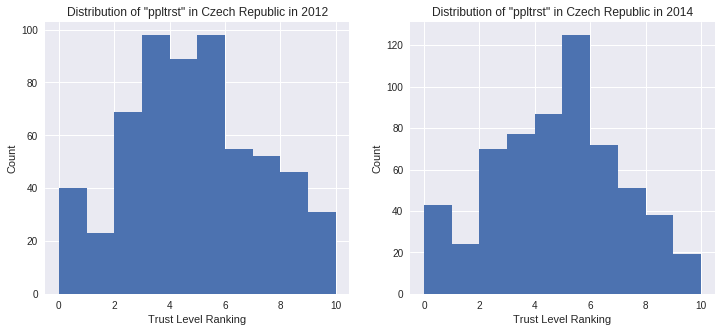

Denmark 

Shapiro Normality 2012: (0.8929166197776794, 0.10693283379077911)
Shapiro Normality 2014: (0.9425466060638428, 0.4519253373146057)
Mean "ppltrst" 2012: (0.8929166197776794, 0.10693283379077911)
Mean "ppltrst" 2014: (0.9425466060638428, 0.4519253373146057)

 KruskalResult(statistic=0.11943127962085082, pvalue=0.7296521329635768)
Do not reject null hypothesis.


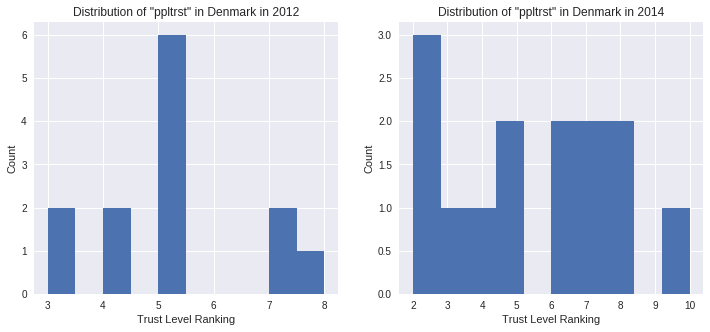

Spain 

Shapiro Normality 2012: (0.949491024017334, 1.6942651933374377e-19)
Shapiro Normality 2014: (0.9663601517677307, 1.5275811452092943e-15)
Mean "ppltrst" 2012: (0.949491024017334, 1.6942651933374377e-19)
Mean "ppltrst" 2014: (0.9663601517677307, 1.5275811452092943e-15)

 KruskalResult(statistic=6.254399514712144, pvalue=0.012388523566141176)
Reject null hypothesis that population medians of groups are equal.


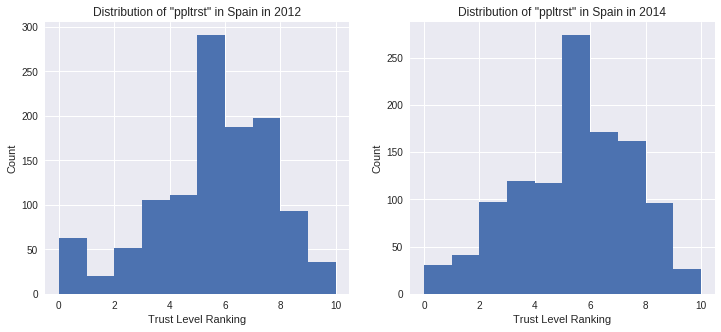

Norway 

Shapiro Normality 2012: (0.9211018085479736, 8.881221102071063e-19)
Shapiro Normality 2014: (0.9292040467262268, 7.928973676032161e-18)
Mean "ppltrst" 2012: (0.9211018085479736, 8.881221102071063e-19)
Mean "ppltrst" 2014: (0.9292040467262268, 7.928973676032161e-18)

 KruskalResult(statistic=0.20681671394808315, pvalue=0.649273954856751)
Do not reject null hypothesis.


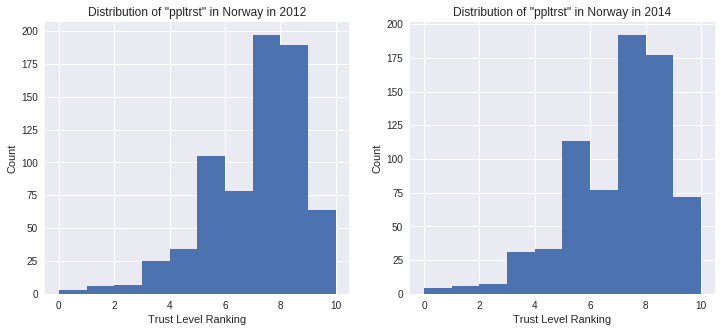

Sweden 

Shapiro Normality 2012: (0.9367397427558899, 1.2586250953636158e-18)
Shapiro Normality 2014: (0.9376322627067566, 1.3852298444033788e-18)
Mean "ppltrst" 2012: (0.9367397427558899, 1.2586250953636158e-18)
Mean "ppltrst" 2014: (0.9376322627067566, 1.3852298444033788e-18)

 KruskalResult(statistic=4.486790845114948, pvalue=0.03415774143761488)
Reject null hypothesis that population medians of groups are equal.


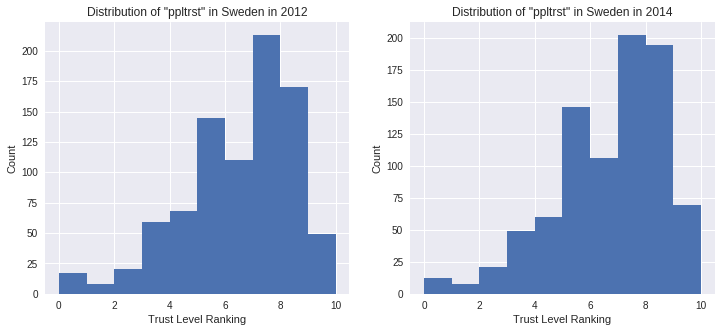

In [24]:
plt.rcParams['figure.figsize'] = 12, 5

for cntry in df.cntry.unique():
  
  print(country_dict[cntry], '\n')
  
  print("Shapiro Normality 2012:", scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst']))
  print("Shapiro Normality 2014:", scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst']))
  
  print('Mean "ppltrst" 2012:', scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst']))
  print('Mean "ppltrst" 2014:', scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst']))
  
  kruskal_result = scipy.stats.kruskal(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst'],
                            df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst'])
  
  print('\n', kruskal_result)

  if kruskal_result[1] < 0.05:
    print('Reject null hypothesis that population medians of groups are equal.')
  else:
    print('Do not reject null hypothesis.')
    
        
  plt.subplot(1, 2, 1)
  plt.title('Distribution of "ppltrst" in {} in 2012'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst'], bins=10)

  plt.subplot(1, 2, 2)
  plt.title('Distribution of "ppltrst" in {} in 2014'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst'], bins=10)

  plt.show()

plt.rcParams['figure.figsize'] = 8, 5

The Kruskal-Wallis test results indicate that trust showed a statistically significant increase in Sweden, and a decrease in Spain, but other countries did not show a significant difference.

### Wilcoxon Signed-Rank Test (paired IDs only)

Switzerland 

Shapiro Normality 2012: (0.9517108201980591, 9.511383786695374e-15)
Shapiro Normality 2014: (0.9547930955886841, 2.4654701498145852e-14)
Mean "ppltrst" 2012: (0.9517108201980591, 9.511383786695374e-15)
Mean "ppltrst" 2014: (0.9547930955886841, 2.4654701498145852e-14)

 WilcoxonResult(statistic=88744.5, pvalue=0.6870826298273109)
Do not reject null hypothesis.


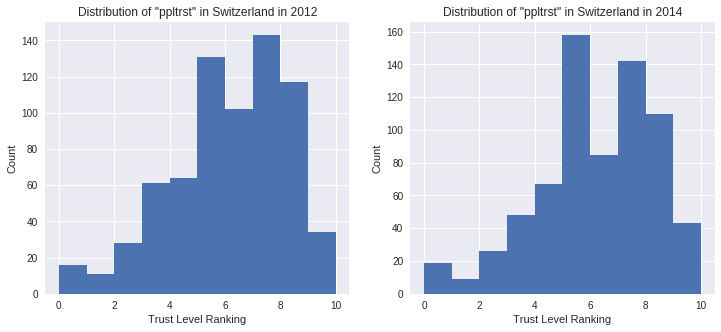

Czech Republic 

Shapiro Normality 2012: (0.9680074453353882, 3.6126571179018185e-10)
Shapiro Normality 2014: (0.9715775847434998, 1.8777941424019673e-09)
Mean "ppltrst" 2012: (0.9680074453353882, 3.6126571179018185e-10)
Mean "ppltrst" 2014: (0.9715775847434998, 1.8777941424019673e-09)

 WilcoxonResult(statistic=61723.5, pvalue=0.8390600771803833)
Do not reject null hypothesis.


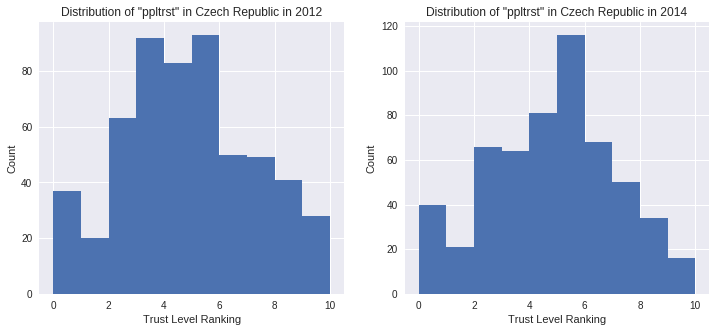

Denmark 

Shapiro Normality 2012: (0.8929166197776794, 0.10693283379077911)
Shapiro Normality 2014: (0.9425466060638428, 0.4519253373146057)
Mean "ppltrst" 2012: (0.8929166197776794, 0.10693283379077911)
Mean "ppltrst" 2014: (0.9425466060638428, 0.4519253373146057)

 WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
Do not reject null hypothesis.


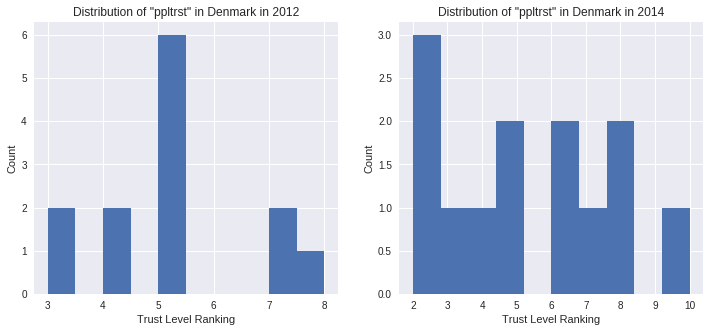

Spain 

Shapiro Normality 2012: (0.949491024017334, 1.6942651933374377e-19)
Shapiro Normality 2014: (0.9663601517677307, 1.5275811452092943e-15)
Mean "ppltrst" 2012: (0.949491024017334, 1.6942651933374377e-19)
Mean "ppltrst" 2014: (0.9663601517677307, 1.5275811452092943e-15)

 WilcoxonResult(statistic=197976.0, pvalue=0.03498230453843465)
Reject null hypothesis that samples come from same distribution.


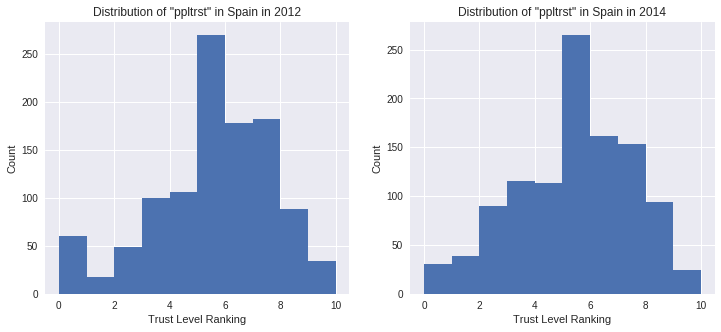

Norway 

Shapiro Normality 2012: (0.9211018085479736, 8.881221102071063e-19)
Shapiro Normality 2014: (0.9292040467262268, 7.928973676032161e-18)
Mean "ppltrst" 2012: (0.9211018085479736, 8.881221102071063e-19)
Mean "ppltrst" 2014: (0.9292040467262268, 7.928973676032161e-18)

 WilcoxonResult(statistic=75026.5, pvalue=0.6221446415196722)
Do not reject null hypothesis.


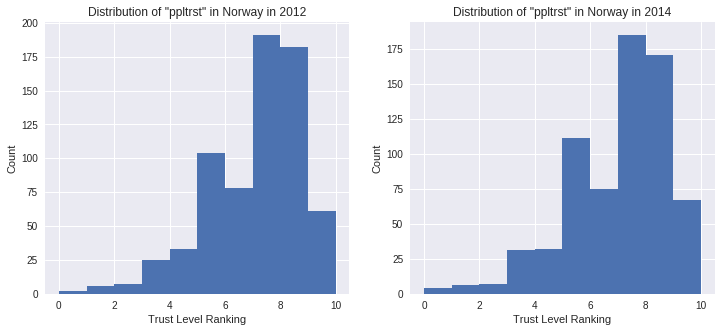

Sweden 

Shapiro Normality 2012: (0.9367397427558899, 1.2586250953636158e-18)
Shapiro Normality 2014: (0.9376322627067566, 1.3852298444033788e-18)
Mean "ppltrst" 2012: (0.9367397427558899, 1.2586250953636158e-18)
Mean "ppltrst" 2014: (0.9376322627067566, 1.3852298444033788e-18)

 WilcoxonResult(statistic=104619.5, pvalue=0.02061688328724722)
Reject null hypothesis that samples come from same distribution.


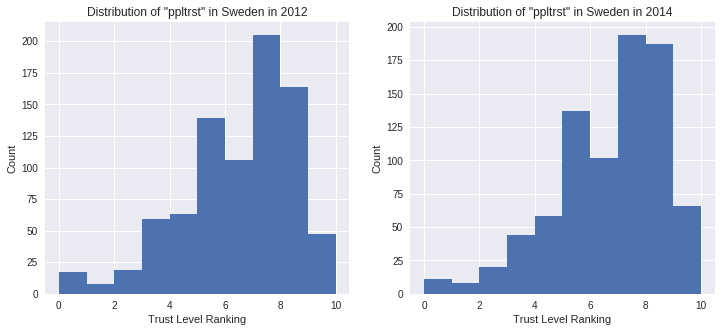

In [25]:
plt.rcParams['figure.figsize'] = 12, 5

for cntry in df.cntry.unique():
  
  print(country_dict[cntry], '\n')
  
  print("Shapiro Normality 2012:", scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst']))
  print("Shapiro Normality 2014:", scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst']))
  
  print('Mean "ppltrst" 2012:', scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['ppltrst']))
  print('Mean "ppltrst" 2014:', scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['ppltrst']))
  
  wilcoxon_score = scipy.stats.wilcoxon(df[(df['year'] == 6) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['ppltrst'],
                            df[(df['year'] == 7) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['ppltrst'])
  
  print('\n', wilcoxon_score)
  if wilcoxon_score[1] < 0.05:
    print('Reject null hypothesis that samples come from same distribution.')
  else:
    print('Do not reject null hypothesis.')
  
  
  plt.subplot(1, 2, 1)
  plt.title('Distribution of "ppltrst" in {} in 2012'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 6) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['ppltrst'], bins=10)

  plt.subplot(1, 2, 2)
  plt.title('Distribution of "ppltrst" in {} in 2014'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 7) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['ppltrst'], bins=10)

  plt.show()

plt.rcParams['figure.figsize'] = 8, 5

In [26]:
df[(df['year'] == 6) & (df['cntry'] == 'ES')]['ppltrst'].describe()

count    1158.000000
mean        5.127807
std         2.161797
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: ppltrst, dtype: float64

In [27]:
df[(df['year'] == 7) & (df['cntry'] == 'ES')]['ppltrst'].describe()

count    1134.000000
mean        4.940035
std         2.117869
min         0.000000
25%         3.000000
50%         5.000000
75%         6.750000
max        10.000000
Name: ppltrst, dtype: float64

In [28]:
df[(df['year'] == 6) & (df['cntry'] == 'SE')]['ppltrst'].describe()

count    859.000000
mean       6.043073
std        2.028758
min        0.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: ppltrst, dtype: float64

In [29]:
df[(df['year'] == 7) & (df['cntry'] == 'SE')]['ppltrst'].describe()

count    867.000000
mean       6.239908
std        2.005794
min        0.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: ppltrst, dtype: float64


## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

The "happy" variable is not normally distributed, so we'll try something other than a t-test

In [30]:
scipy.stats.kruskal(df[df['year'] == 6]['happy'], df[df['year'] == 7]['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

The Kruskal-Wallis test here indcates that there might be a difference. The p-value of the test is on the cusp of significance, but not quite there.

Denmark's sample is so small that we cannot conclude that the data is not normally distributed.

### Kruskal-Wallis Test

Switzerland 

Shapiro Normality 2012: (0.8773602843284607, 1.4611401593361174e-23)
Shapiro Normality 2014: (0.8950787782669067, 4.273768685964887e-22)
Mean "happy" 2012: (0.8773602843284607, 1.4611401593361174e-23)
Mean "happy" 2014: (0.8950787782669067, 4.273768685964887e-22)

 KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)
Do not reject null hypothesis.


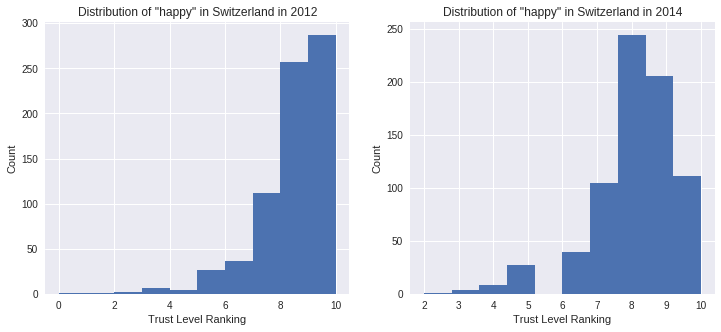

Czech Republic 

Shapiro Normality 2012: (0.9462587833404541, 5.939277796787254e-14)
Shapiro Normality 2014: (0.9448645710945129, 3.1643033327052525e-14)
Mean "happy" 2012: (0.9462587833404541, 5.939277796787254e-14)
Mean "happy" 2014: (0.9448645710945129, 3.1643033327052525e-14)

 KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)
Do not reject null hypothesis.


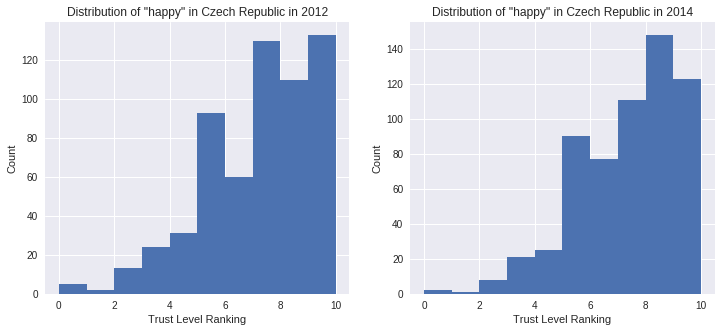

Denmark 

Shapiro Normality 2012: (0.9160983562469482, 0.22210942208766937)
Shapiro Normality 2014: (0.9213663339614868, 0.23006466031074524)
Mean "happy" 2012: (0.9160983562469482, 0.22210942208766937)
Mean "happy" 2014: (0.9213663339614868, 0.23006466031074524)

 KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)
Do not reject null hypothesis.


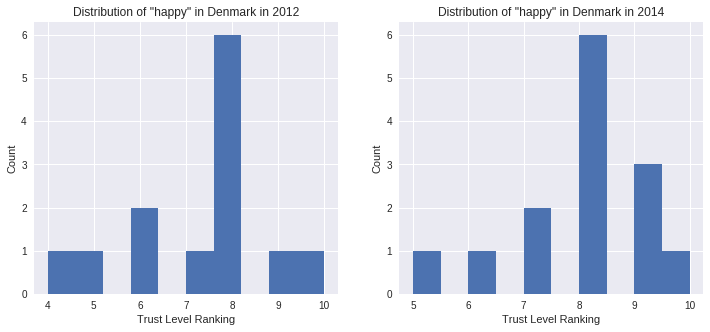

Spain 

Shapiro Normality 2012: (0.9052610397338867, 3.4151276945678624e-26)
Shapiro Normality 2014: (0.9136462211608887, 6.898763644671094e-25)
Mean "happy" 2012: (0.9052610397338867, 3.4151276945678624e-26)
Mean "happy" 2014: (0.9136462211608887, 6.898763644671094e-25)

 KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)
Do not reject null hypothesis.


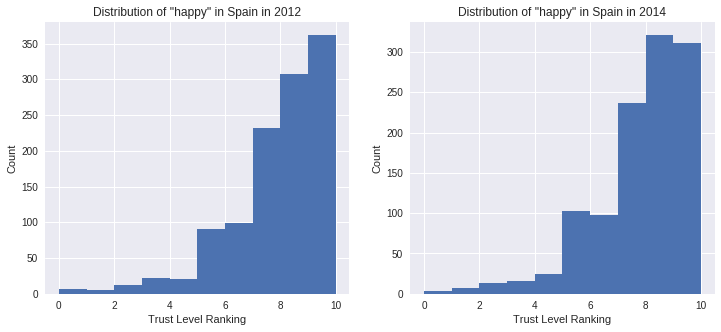

Norway 

Shapiro Normality 2012: (0.8498518466949463, 2.291937245544563e-25)
Shapiro Normality 2014: (0.8795287609100342, 4.6808705797415216e-23)
Mean "happy" 2012: (0.8498518466949463, 2.291937245544563e-25)
Mean "happy" 2014: (0.8795287609100342, 4.6808705797415216e-23)

 KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)
Reject null hypothesis that population medians of groups are equal.


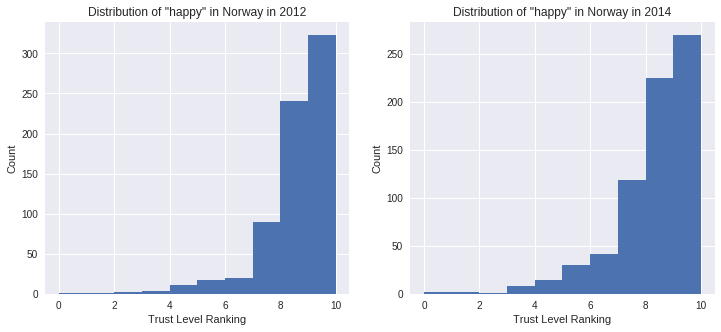

Sweden 

Shapiro Normality 2012: (0.9025380611419678, 5.918160728712866e-23)
Shapiro Normality 2014: (0.912103533744812, 5.600742285549146e-22)
Mean "happy" 2012: (0.9025380611419678, 5.918160728712866e-23)
Mean "happy" 2014: (0.912103533744812, 5.600742285549146e-22)

 KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)
Do not reject null hypothesis.


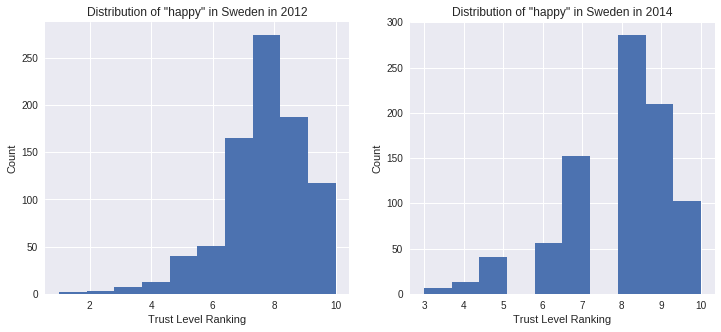

In [31]:
plt.rcParams['figure.figsize'] = 12, 5

for cntry in df.cntry.unique():
  
  print(country_dict[cntry], '\n')
  
  print("Shapiro Normality 2012:", scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy']))
  print("Shapiro Normality 2014:", scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy']))
  
  
  print('Mean "happy" 2012:', scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy']))
  print('Mean "happy" 2014:', scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy']))
  
  kruskal_result = scipy.stats.kruskal(df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy'],
                            df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy'])
  
  print('\n', kruskal_result)

  if kruskal_result[1] < 0.05:
    print('Reject null hypothesis that population medians of groups are equal.')
  else:
    print('Do not reject null hypothesis.')
    
        
  plt.subplot(1, 2, 1)
  plt.title('Distribution of "happy" in {} in 2012'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy'], bins=10)

  plt.subplot(1, 2, 2)
  plt.title('Distribution of "happy" in {} in 2014'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy'], bins=10)

  plt.show()

plt.rcParams['figure.figsize'] = 8, 5

### Wilcoxon Signed-Rank Test (paired IDs only)

Switzerland 

Shapiro Normality 2012: (0.8773602843284607, 1.4611401593361174e-23)
Shapiro Normality 2014: (0.8950787782669067, 4.273768685964887e-22)
Mean "happy" 2012: (0.8773602843284607, 1.4611401593361174e-23)
Mean "happy" 2014: (0.8950787782669067, 4.273768685964887e-22)

 WilcoxonResult(statistic=75726.5, pvalue=0.7575607435639675)
Do not reject null hypothesis.


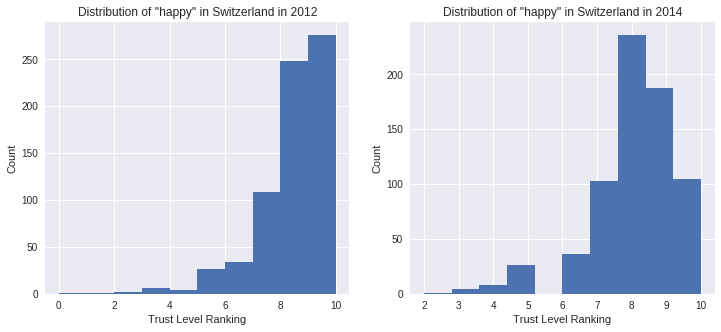

Czech Republic 

Shapiro Normality 2012: (0.9462587833404541, 5.939277796787254e-14)
Shapiro Normality 2014: (0.9448645710945129, 3.1643033327052525e-14)
Mean "happy" 2012: (0.9462587833404541, 5.939277796787254e-14)
Mean "happy" 2014: (0.9448645710945129, 3.1643033327052525e-14)

 WilcoxonResult(statistic=55932.0, pvalue=0.22849644123659796)
Do not reject null hypothesis.


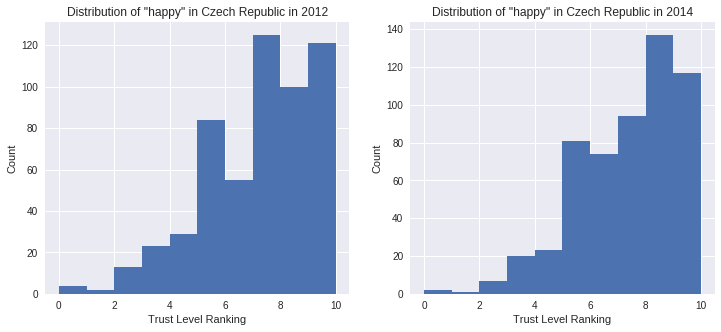

Denmark 

Shapiro Normality 2012: (0.9160983562469482, 0.22210942208766937)
Shapiro Normality 2014: (0.9213663339614868, 0.23006466031074524)
Mean "happy" 2012: (0.9160983562469482, 0.22210942208766937)
Mean "happy" 2014: (0.9213663339614868, 0.23006466031074524)

 WilcoxonResult(statistic=16.0, pvalue=0.2365019314807173)
Do not reject null hypothesis.


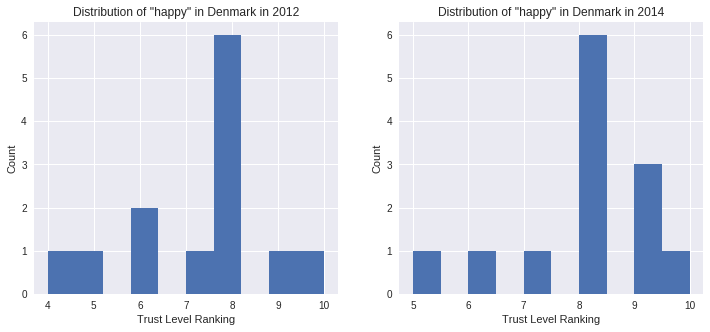

Spain 

Shapiro Normality 2012: (0.9052610397338867, 3.4151276945678624e-26)
Shapiro Normality 2014: (0.9136462211608887, 6.898763644671094e-25)
Mean "happy" 2012: (0.9052610397338867, 3.4151276945678624e-26)
Mean "happy" 2014: (0.9136462211608887, 6.898763644671094e-25)

 WilcoxonResult(statistic=190064.5, pvalue=0.1573993272703731)
Do not reject null hypothesis.


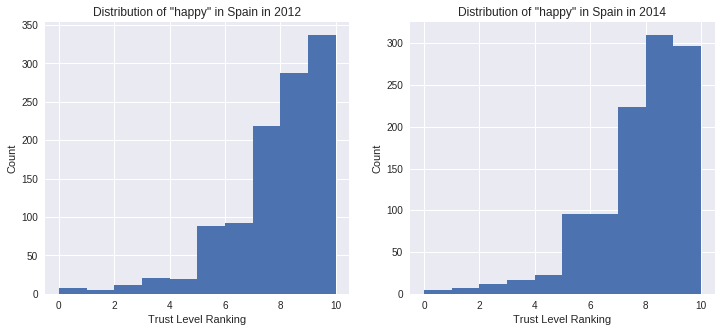

Norway 

Shapiro Normality 2012: (0.8498518466949463, 2.291937245544563e-25)
Shapiro Normality 2014: (0.8795287609100342, 4.6808705797415216e-23)
Mean "happy" 2012: (0.8498518466949463, 2.291937245544563e-25)
Mean "happy" 2014: (0.8795287609100342, 4.6808705797415216e-23)

 WilcoxonResult(statistic=60547.0, pvalue=1.4306917852645772e-05)
Reject null hypothesis that samples come from same distribution.


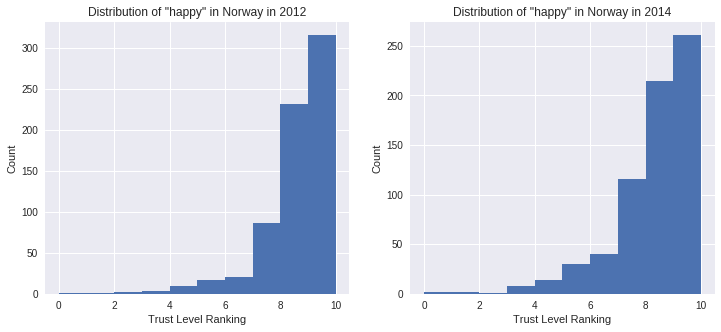

Sweden 

Shapiro Normality 2012: (0.9025380611419678, 5.918160728712866e-23)
Shapiro Normality 2014: (0.912103533744812, 5.600742285549146e-22)
Mean "happy" 2012: (0.9025380611419678, 5.918160728712866e-23)
Mean "happy" 2014: (0.912103533744812, 5.600742285549146e-22)

 WilcoxonResult(statistic=103562.0, pvalue=0.5895941229841813)
Do not reject null hypothesis.


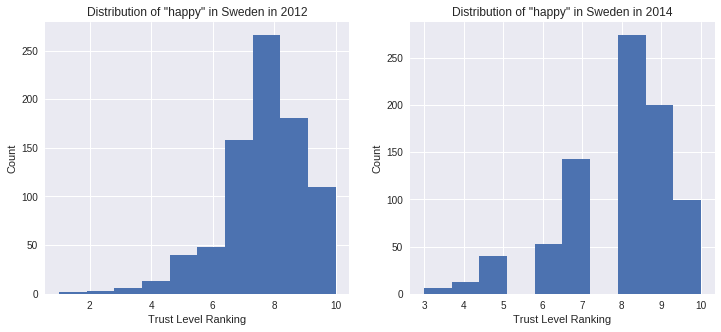

In [32]:
plt.rcParams['figure.figsize'] = 12, 5

for cntry in df.cntry.unique():
  
  print(country_dict[cntry], '\n')
  
  print("Shapiro Normality 2012:", scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy']))
  print("Shapiro Normality 2014:", scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy']))
  
  print('Mean "happy" 2012:', scipy.stats.shapiro(df[(df['year'] == 6) & (df['cntry'] == cntry)]['happy']))
  print('Mean "happy" 2014:', scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry)]['happy']))
  
  wilcoxon_score = scipy.stats.wilcoxon(df[(df['year'] == 6) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['happy'],
                            df[(df['year'] == 7) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['happy'])
  
  print('\n', wilcoxon_score)
  if wilcoxon_score[1] < 0.05:
    print('Reject null hypothesis that samples come from same distribution.')
  else:
    print('Do not reject null hypothesis.')
  
  
  plt.subplot(1, 2, 1)
  plt.title('Distribution of "happy" in {} in 2012'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 6) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['happy'], bins=10)

  plt.subplot(1, 2, 2)
  plt.title('Distribution of "happy" in {} in 2014'.format(country_dict[cntry]))
  plt.xlabel('Trust Level Ranking')
  plt.ylabel('Count')
  plt.hist(df[(df['year'] == 7) & (df['cntry'] == cntry) & (df['idno'].isin(overlap_dict[cntry]))]['happy'], bins=10)

  plt.show()

plt.rcParams['figure.figsize'] = 8, 5  

The only country to show a statsitically significant increase in reported happiness was Norway.

# A/B Tests (Independent Only)


## Who reported watching more TV in 2012, men or women?

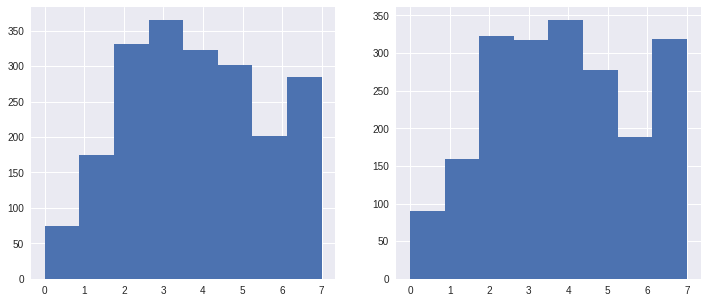

In [33]:
plt.rcParams['figure.figsize'] = 12, 5

plt.subplot(121)
plt.hist(df[(df['year'] == 6) & (df['gndr'] == 1)]['tvtot'], bins=8)
plt.subplot(122)
plt.hist(df[(df['year'] == 6) & (df['gndr'] == 2)]['tvtot'], bins=8)
plt.show()

In [34]:
scipy.stats.median_test(df[(df['year'] == 6) & (df['gndr'] == 1)]['tvtot'],
                    df[(df['year'] == 6) & (df['gndr'] == 2)]['tvtot'])

(0.09368265277280617, 0.7595466128937625, 4.0, array([[ 787,  784],
        [1266, 1234]]))

0.7595 p-value for median test.

In [35]:
scipy.stats.kruskal(df[(df['year'] == 6) & (df['gndr'] == 1)]['tvtot'],
                    df[(df['year'] == 6) & (df['gndr'] == 2)]['tvtot'])

KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)

There was not a statistically significant difference between the tv-watching habits of men and women in 2012.


## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

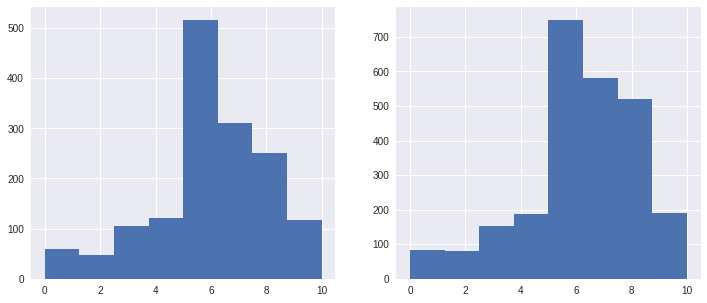

In [36]:
plt.rcParams['figure.figsize'] = 12, 5

plt.subplot(121)
plt.hist(df[(df['year'] == 6) & (df['partner'] == 0)]['pplfair'], bins=8)
plt.subplot(122)
plt.hist(df[(df['year'] == 6) & (df['partner'] == 1)]['pplfair'], bins=8)
plt.show()

In [37]:
scipy.stats.median_test(df[(df['year'] == 6) & (df['partner'] == 0)]['pplfair'],
                    df[(df['year'] == 6) & (df['partner'] == 1)]['pplfair'])

(15.427324224044817, 8.573954635635481e-05, 6.0, array([[ 678, 1290],
        [ 851, 1252]]))

In [38]:
scipy.stats.kruskal(df[(df['year'] == 6) & (df['partner'] == 0)]['pplfair'],
                    df[(df['year'] == 6) & (df['partner'] == 1)]['pplfair'])

KruskalResult(statistic=11.887452362061, pvalue=0.0005651336752494688)

In 2012, people living with a partner were more likely to believe that people were fair.

# A/B/C/(etc.) Tests

In [0]:
country_list_short = ['CH', 'CZ', 'ES']


## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

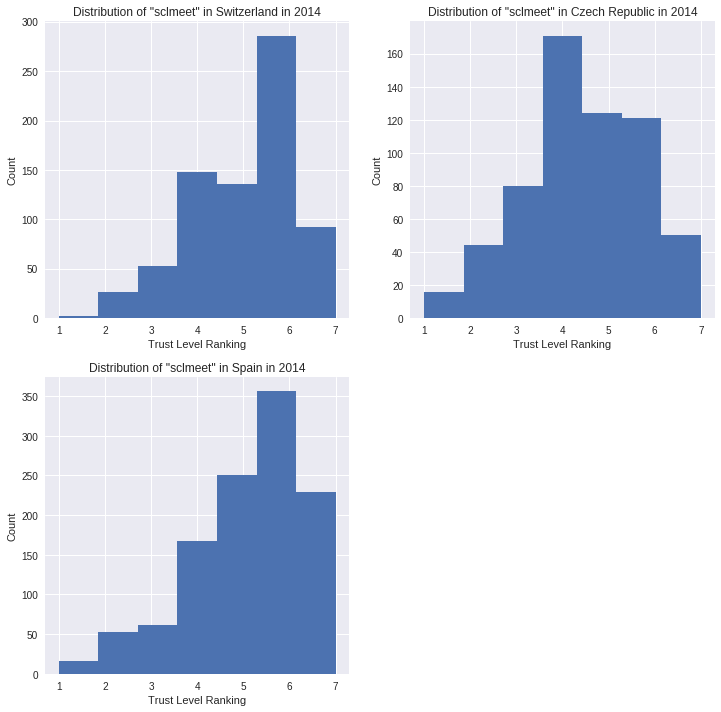

In [42]:
plt.rcParams['figure.figsize'] = 12, 12


plt.subplot(2, 2, 1)
plt.title('Distribution of "sclmeet" in {} in 2014'.format(country_dict['CH']))
plt.xlabel('Trust Level Ranking')
plt.ylabel('Count')
plt.hist(df[(df['cntry'] == 'CH') & (df['year'] == 7)]['sclmeet'], bins=7)

plt.subplot(2, 2, 2)
plt.title('Distribution of "sclmeet" in {} in 2014'.format(country_dict['CZ']))
plt.xlabel('Trust Level Ranking')
plt.ylabel('Count')
plt.hist(df[(df['cntry'] == 'CZ') & (df['year'] == 7)]['sclmeet'], bins=7)

plt.subplot(2, 2, 3)
plt.title('Distribution of "sclmeet" in {} in 2014'.format(country_dict['ES']))
plt.xlabel('Trust Level Ranking')
plt.ylabel('Count')
plt.hist(df[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclmeet'], bins=7)

plt.show()

In [49]:
for cntry in country_list_short:
  print('Shapiro-Wilk for '+cntry+': ',
        scipy.stats.shapiro(df[(df['cntry'] == cntry) & (df['year'] == 7)]['sclmeet']))
  print(cntry+' mean sclmeet:',
        df[(df['cntry'] == cntry) & (df['year'] == 7)]['sclmeet'].mean())

Shapiro-Wilk for CH:  (0.8976361155509949, 7.658747353767709e-22)
CH mean sclmeet: 5.174966352624495
Shapiro-Wilk for CZ:  (0.9442528486251831, 2.5791458676876697e-14)
CZ mean sclmeet: 4.4950495049504955
Shapiro-Wilk for ES:  (0.8927679657936096, 2.280180298346974e-27)
ES mean sclmeet: 5.263668430335097


We can reject the null hypothesis that the data is normally distributed for all three of these countries.

In [56]:
print("Switzerland-Czech Republic:\n", scipy.stats.mannwhitneyu(df[(df['cntry'] == 'CH') & (df['year'] == 7)]['sclmeet'],
                              df[(df['cntry'] == 'CZ') & (df['year'] == 7)]['sclmeet']))
print("Switzerland-Spain\n", scipy.stats.mannwhitneyu(df[(df['cntry'] == 'CH') & (df['year'] == 7)]['sclmeet'],
                              df[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclmeet']))
print("Czech Republic-Spain\n", scipy.stats.mannwhitneyu(df[(df['cntry'] == 'CZ') & (df['year'] == 7)]['sclmeet'],
                              df[(df['cntry'] == 'ES') & (df['year'] == 7)]['sclmeet']))

Switzerland-Czech Republic:
 MannwhitneyuResult(statistic=164687.0, pvalue=1.4733240066723786e-18)
Switzerland-Spain
 MannwhitneyuResult(statistic=397621.0, pvalue=0.016845383400336846)
Czech Republic-Spain
 MannwhitneyuResult(statistic=238281.0, pvalue=2.119303290451085e-27)


Spain's respondents met socially with others most often, repsondents from the Czech Republic went out the least, and Swiss respondents were slightly behind Spanish responedents.


## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

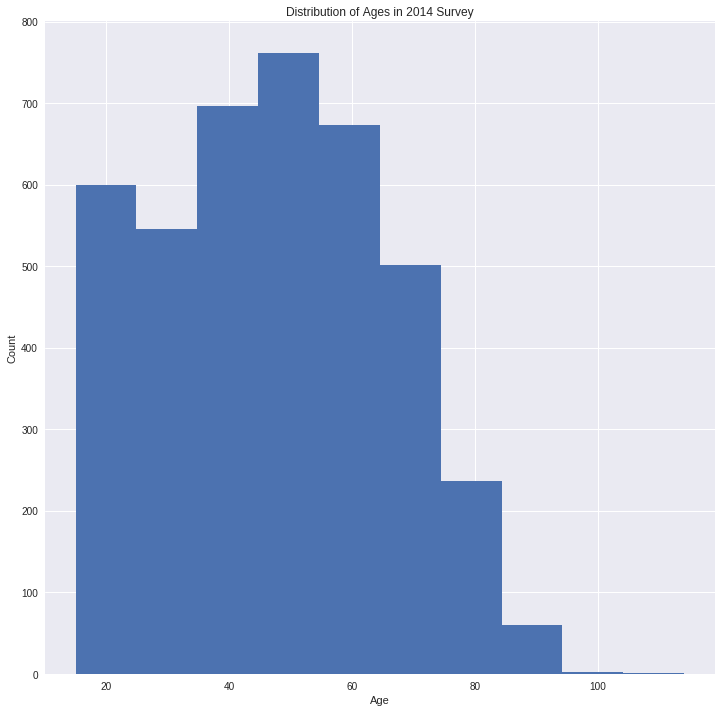

In [57]:
plt.title('Distribution of Ages in 2014 Survey')

plt.hist(df[df['year'] == 7]['agea'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [0]:
def classify_by_age(x):
  if x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else:
    return 7

In [0]:
df['age_category'] = df['agea'].apply(lambda x: classify_by_age(x))

In [60]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,age_category
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,6
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,5
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,0.0,2
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,6
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,5


In [0]:
age_categories = [1, 2, 3, 4, 5, 6, 7]
age_dict = {1:'Teens (18-20)', 2:'Twentysomethings (20-29)', 3:'Thirtysomethings (30-39)',
            4:'Fortysomethings (40-49)', 5:'Fiftysomethings (50-59)', 6:'Sixtysomethings (60-69)',
            7:'Seventyplus (70+)'}

In [80]:
for age_category in age_categories:
  print('\n')
  print(age_dict[age_category])
  print('\n')
  for cntry in country_list_short:
    
    print(country_dict[cntry]+':')
    print(len(df[(df['age_category'] == age_category) & (df['cntry'] == cntry)]), 'respondents')
    
    shapiro_result = scipy.stats.shapiro(df[(df['year'] == 7) & (df['cntry'] == cntry) & (df['age_category'] == age_category)]['sclmeet'])
    
    print(shapiro_result)
    if shapiro_result[1] < 0.05:
      print('Non-normally distributed.')
    else:
      print('Possibly normally distributed.')
    
    print('\n')



Teens (18-20)


Switzerland:
106 respondents
(0.8403081893920898, 1.5956052266119514e-06)
Non-normally distributed.


Czech Republic:
85 respondents
(0.7583595514297485, 5.695752406609245e-06)
Non-normally distributed.


Spain:
113 respondents
(0.8519233465194702, 2.549650162109174e-06)
Non-normally distributed.




Twentysomethings (20-29)


Switzerland:
213 respondents
(0.8103954195976257, 2.0416263124545253e-10)
Non-normally distributed.


Czech Republic:
152 respondents
(0.9014465808868408, 2.7726021016860614e-06)
Non-normally distributed.


Spain:
290 respondents
(0.8370476961135864, 9.344473111960738e-12)
Non-normally distributed.




Thirtysomethings (30-39)


Switzerland:
257 respondents
(0.8359360694885254, 2.982789362726557e-11)
Non-normally distributed.


Czech Republic:
205 respondents
(0.9467618465423584, 0.0009860952850431204)
Non-normally distributed.


Spain:
418 respondents
(0.899916410446167, 7.686721259503315e-10)
Non-normally distributed.




Fortysomethings (40-4

In [83]:
for age_category in age_categories:
  print(age_dict[age_category], ":")
  print('\n')
  print('CH mean', df[(df['year'] == 7) & (df['cntry'] == 'CH') & (df['age_category'] == age_category)]['sclmeet'].mean())
  print('CZ mean', df[(df['year'] == 7) & (df['cntry'] == 'CZ') & (df['age_category'] == age_category)]['sclmeet'].mean())
  print('ES mean', df[(df['year'] == 7) & (df['cntry'] == 'ES') & (df['age_category'] == age_category)]['sclmeet'].mean())
  print('\n')
  
  print("Switzerland-Czech Republic:\n",
        scipy.stats.mannwhitneyu(df[(df['cntry'] == 'CH') & (df['year'] == 7) & (df['age_category'] == age_category)]['sclmeet'],
                                 df[(df['cntry'] == 'CZ') & (df['year'] == 7) & (df['age_category'] == age_category)]['sclmeet']))
  print("Switzerland-Spain:\n",
        scipy.stats.mannwhitneyu(df[(df['cntry'] == 'CH') & (df['year'] == 7) & (df['age_category'] == age_category)]['sclmeet'],
                                 df[(df['cntry'] == 'ES') & (df['year'] == 7) & (df['age_category'] == age_category)]['sclmeet']))
  print("Czech Republic-Spain:\n",
        scipy.stats.mannwhitneyu(df[(df['cntry'] == 'CZ') & (df['year'] == 7) & (df['age_category'] == age_category)]['sclmeet'],
                                 df[(df['cntry'] == 'ES') & (df['year'] == 7) & (df['age_category'] == age_category)]['sclmeet']))
  print('\n')

Teens (18-20) :


CH mean 5.616666666666666
CZ mean 5.2727272727272725
ES mean 5.854838709677419


Switzerland-Czech Republic:
 MannwhitneyuResult(statistic=941.0, pvalue=0.34244411352387627)
Switzerland-Spain:
 MannwhitneyuResult(statistic=1718.0, pvalue=0.2205191314355333)
Czech Republic-Spain:
 MannwhitneyuResult(statistic=1019.5, pvalue=0.490194974851848)


Twentysomethings (20-29) :


CH mean 5.635514018691588
CZ mean 5.189473684210526
ES mean 5.7973856209150325


Switzerland-Czech Republic:
 MannwhitneyuResult(statistic=3799.0, pvalue=0.0005856334408540118)
Switzerland-Spain:
 MannwhitneyuResult(statistic=7544.5, pvalue=0.12740126751522912)
Czech Republic-Spain:
 MannwhitneyuResult(statistic=4937.5, pvalue=5.288004995795187e-06)


Thirtysomethings (30-39) :


CH mean 5.404255319148936
CZ mean 4.2967032967032965
ES mean 5.1567567567567565


Switzerland-Czech Republic:
 MannwhitneyuResult(statistic=3485.5, pvalue=6.174552215583787e-10)
Switzerland-Spain:
 MannwhitneyuResult(statist

In [84]:
for age_category in age_categories:
  print(age_dict[age_category], ":")

Teens (18-20) :
Twentysomethings (20-29) :
Thirtysomethings (30-39) :
Fortysomethings (40-49) :
Fiftysomethings (50-59) :
Sixtysomethings (60-69) :
Seventyplus (70+) :


### Teens (18-20) :

No significant differences in social behavior.

### Twentysomethings (20-29) :

Czech respondents age 20-29 meet with others socially significantly less than either Swiss or Spanish respondents. Swiss and Spanish respondents show no significant difference.

### Thirtysomethings (30-39) :

From most to least socially active: Swiss, Spanish, Czech. This is a departure from other age categories, where Spain's respondents are either in the lead or not significantly different from the Swiss. 

### Fortysomethings (40-49) :

As with 20-29-year-olds, this category shows less activity among Czech respondents, but no significant difference between CH and ES. Switzerland's mean is slightly higher, but the p-value indicates that this is not significant.

### Fiftysomethings (50-59) :

This group follows the same pattern as twentysomethings and fortysomethings.

### Sixtysomethings (60-69) :

Same as fiftysomethings, fortysomethings, and twentysomethings.

### Seventyplus (70+) :

Spanish seniors are much more active than their counterparts in Switzerland and the Czech Republic. Swiss respondents are still more active than Czech respondents.